<a href="https://colab.research.google.com/github/JazmineOrtiz/Simulaci-n-I/blob/main/Otras_Aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un banco emplea 3 cajeros para servir a sus clientes. Los clientes arriban de acuerdo a un proceso poisson a una razón media de 40 por hora. Si un cliente encuentra todos los cajeros ocupados, entonces se incorpora a la cola que alimenta a todos os cajeros. El tiempo que dura la transacción entre un cajero y un cliente sigue una disstribución uniforme entre 0 y 1 minuto. Para esta información, ¿Cuál es el tiempo promedio en el sistema?, ¿Cuál es la cantidad promedio de clientes en el sistema?

***Metodología para la simuación de Monte Carlo:***

1. Generación de Tiempos de Llegada:

* Dado que las llegadas siguen un proceso Poisson, generaremos tiempos de llegada usando la tasa promedio de 40 clientes por hora.

2. Generación de Tiempos de Servicio:

* Los tiempos de servicio se distribuyen uniformemente entre 0 y 1 minuto. Podemos generar estos tiempos directamente utilizando una distribución uniforme.

3. Simulación del Sistema de Colas:

* Con los tiempos de llegada y servicio generados, simularíamos el proceso de servicio en los 3 cajeros, teniendo en cuenta cuando un cliente tiene que esperar en cola y cuándo puede ser atendido inmediatamente.

4. Recolección de Estadísticas:

* Durante la simulación, recolectaremos datos sobre el tiempo total que cada cliente pasa en el sistema y la longitud de la cola en intervalos regulares.

5. Análisis de Resultados:

* Con los datos recolectados, calcularemos el tiempo promedio en el sistema y la cantidad promedio de clientes en el sistema. Repetiremos la simulación muchas veces para obtener estimaciones realistas.

Tiempo promedio en el sistema: 0.5186415191176643
Cantidad promedio de clientes en el sistema: 0.9724770642201835


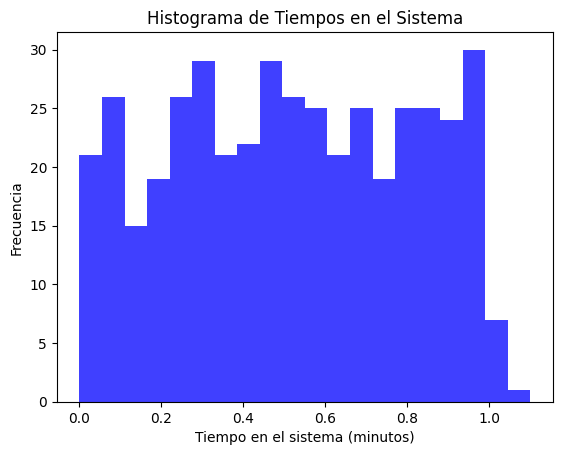

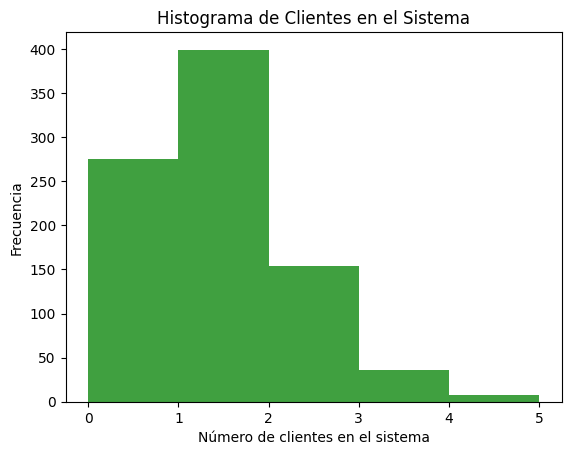

In [6]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
tasa_llegadas_base = 40 / 60  # clientes por minuto, base
tasa_servicio = 1 / 0.5  # servicios por minuto por cajero
num_cajeros = 3
tiempo_simulacion = 480  # en minutos, 8 horas de trabajo

# Función para generar tiempos de llegada según un proceso Poisson modificado usando rnd.expovariate
def generar_llegadas(lam_base, tiempo):
    llegadas = []
    tiempo_actual = 0
    while tiempo_actual <= tiempo:
        # Modulación de la tasa de llegadas para simular horas pico y valle
        if tiempo_actual < tiempo / 3 or tiempo_actual > 2 * tiempo / 3:
            lam = lam_base * 1.5  # Aumento durante las horas pico
        else:
            lam = lam_base * 0.7  # Disminución durante las horas valle
        tiempo_entre_llegadas = rnd.expovariate(lam)
        tiempo_actual += tiempo_entre_llegadas
        llegadas.append(tiempo_actual)
    return llegadas

# Función para simular el banco
def simular_banco(llegadas, mu, num_cajeros, tiempo_simulacion):
    cajeros_disponibles = [0] * num_cajeros
    tiempos_en_sistema = []
    eventos = []

    for llegada in llegadas:
        primer_cajero_disponible = min(cajeros_disponibles)
        inicio_servicio = max(llegada, primer_cajero_disponible)
        tiempo_servicio = rnd.uniform(0, 1)
        fin_servicio = inicio_servicio + tiempo_servicio
        tiempos_en_sistema.append(fin_servicio - llegada)
        eventos.append((llegada, 'llegada'))
        eventos.append((fin_servicio, 'salida'))
        cajeros_disponibles[cajeros_disponibles.index(primer_cajero_disponible)] = fin_servicio

    eventos.sort()
    clientes_presentes = []
    clientes_en_el_sistema = 0
    for tiempo, tipo in eventos:
        if tipo == 'llegada':
            clientes_en_el_sistema += 1
        else:
            clientes_en_el_sistema -= 1
        clientes_presentes.append(clientes_en_el_sistema)

    return tiempos_en_sistema, np.mean(clientes_presentes), clientes_presentes

# Generar llegadas
llegadas = generar_llegadas(tasa_llegadas_base, tiempo_simulacion)

# Simulación
tiempos_en_sistema, promedio_clientes, clientes_presentes = simular_banco(llegadas, tasa_servicio, num_cajeros, tiempo_simulacion)

# Resultados
print("Tiempo promedio en el sistema:", np.mean(tiempos_en_sistema))
print("Cantidad promedio de clientes en el sistema:", promedio_clientes)

# Histograma de los tiempos en el sistema
plt.hist(tiempos_en_sistema, bins=20, alpha=0.75, color='blue')
plt.title('Histograma de Tiempos en el Sistema')
plt.xlabel('Tiempo en el sistema (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la cantidad de clientes en el sistema
plt.hist(clientes_presentes, bins=max(clientes_presentes) - min(clientes_presentes), alpha=0.75, color='green')
plt.title('Histograma de Clientes en el Sistema')
plt.xlabel('Número de clientes en el sistema')
plt.ylabel('Frecuencia')
plt.show()
